In [200]:
%matplotlib inline
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [228]:
# Reults is a dict of false positive reates, 
# indexed as 
#   - results[(FILE_NAME, alpha)][CLASSIFIER_NAME] = (g0_fp_true, g1_fp_true, g0_fp_true, g1_fp_opti)

alphas = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.01, 0]
f_names   = ['Outputs/adult.pickle', 'Outputs/recidivism.pickle', 'Outputs/lawschool.pickle', 'Outputs/student.pickle']
clf_names = ['GB_base' ,'SV_base' ,'LG_base' ,'GB_equal' ,'SV_equal' ,'LG_equal' ,'LR_0.2' ,'LR_0.1', 'LR_0.01' ,'DT_0.2', 'DT_0.1' ,'DT_0.01']

real_clf_names = {'GB_base': "Gradient Boosting \n(base)" ,'SV_base': "SVM \n(Base)" ,'LG_base': "Logistic Regression\n(base)",
                  'GB_equal': "Gradient Boosting \n(equal representation)" ,'SV_equal': "SVM \n(equal representation)"  ,'LG_equal': 'Logistic Regression \n(equal representation)', 'LR_0.2': 'Linear \n(gamma=0.2)' ,'LR_0.1': 'Linear \n(gamma=0.1)', 'LR_0.01':'Linear \n(gamma=0.01)' ,'DT_0.2': 'Decision Tree \n(gamma=0.2)', 'DT_0.1': 'Decision Tree \n(gamma=0.1)','DT_0.01': 'Decision Tree \n(gamma=0.01)'}


names = ['Income', 'Recidivism', 'Law Schol', 'Students']

results = pkl.load(open('Outputs/false_postive_results_2_agreedsense_only.pickle', 'rb'))
#results = pkl.load(open('Outputs/false_postive_results_sense_only.pickle', 'rb'))

In [130]:
for file_name in f_names:
    for alpha in alphas:
        for clf_name in clf_names:
            print(results[(file_name, alpha)][clf_name])

KeyError: ('Outputs/adult.pickle', 1)

In [131]:
found = []
for r in results[(f_names[0], 0.9)][0.9][0][0]:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-131-0bd6b83f3464>, line 3)

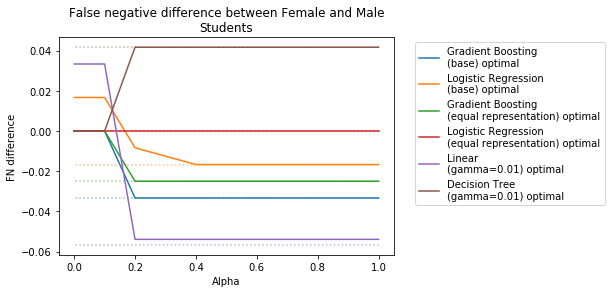

In [250]:
i = 3
colors = ['C'+str(j) for j in range(100)]
color_index = 0
f_name = f_names[i]
for clf in ['GB_base', 
            'LG_base',
            'GB_equal' ,
            'LG_equal' ,
            'LR_0.01',
            'DT_0.01']:
    
    x = alphas
    #y = [abs(abs(results[(f_name, alpha)][clf][0] - results[(f_name, alpha)][clf][1]) 
    #     - abs(results[(f_name, alpha)][clf][2] - results[(f_name, alpha)][clf][3]))
    #            for alpha in alphas]
    y1 = [results[(f_name, alpha, 'fn')][clf][1] - results[(f_name, alpha, 'fn')][clf][0] for alpha in alphas]
    y2 = [results[(f_name, alpha, 'fn')][clf][3] - results[(f_name, alpha, 'fn')][clf][2] for alpha in alphas]
    #print(y2[:2])
    plt.plot(x, y1,                                         color=colors[color_index], linestyle='dotted', alpha=0.5)
    plt.plot(x, y2, label=real_clf_names[clf] + ' optimal', color=colors[color_index], linestyle='-')
    color_index += 1
plt.title('False negative difference between Female and Male\n' + names[i])
plt.xlabel('Alpha')
plt.ylabel("FN difference")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [221]:
diffs = [[[0.12456926337971018, 0.12456926337971018],
[0.15204476511005247, 0.17703604962694602],
[0.15000618344654285, 0.15085209830232946],
[0.1859020192564279, 0.1859020192564279],
[0.16199115066590636, 0.1762681882930912],
[0.19422937251506225, 0.19422937251506225]],

[[0.15151026048033223, -0.06223185567388467],
[0.24855707608345567, -0.02159755116205253],
[0.16514086715506238, -0.05442844343996345],
[0.0, 0.0],
[0.11192911022357421, -0.008020513083250358],
[0.033203786184861084, -0.00612554387902009]],

[[0.24509254942852304, 0.23002925828928256],
[0.24721372311708323, 0.23000431325638154],
[0.25251497442158805, 0.24072374442118055],
[0.5575837914558908, 0.37751000469654494],
[0.0873987925830016, 0.0873987925830016],
[0.06768213507319439, 0.06216541487670846]],

[[0.005440505785774319, -0.1286584387479528],
[-0.06766877268795424, -0.14281797131541374],
[0.005882352941176464, -0.050973834349793426],
[0.0, 0.0],
[-0.08041162304589414, -0.2200350431040968],
[-0.18741487767702592, -0.20480618202485212]]]



diffs2 = [[[-0.05195455595019491, -0.05195455595019491],
[-0.04405940248612375, -0.05684575636835447],
[0.06260308964782337, 0.06047157037344694],
[-0.030952597796459286, -0.005952597796459291],
[0.004116083797265246, -0.004389062437496427],
[0.01680553661424547, 0.01680553661424547]],
        
        [[-0.08513424753834099, 0.022227374510698367],
[-0.14158895811405506, 0.01641182749562385],
[-0.08426735756741834, 0.021275395068759473],
[0.0, 0.0],
[-0.05091301192658437, 0.0021780090737850213],
[-0.0038673573717982776, -1.5873015873015916e-05]],
        
        [[-0.3830712200785652, -0.3576743946817398],
[-0.36384368006670864, -0.34645237571888254],
[-0.3622003674858746, -0.3448090631380485],
[-0.8985523776796814, -0.310333061272722],
[-0.367626486892205, -0.3224228982103554],
[-0.36720758745289994, -0.2659382547007294]],
        
[[-0.03333333333333334, -0.016666666666666677],
[-0.01669082125603863, 0.05118499573742541],
[-0.024999999999999994, -0.016666666666666663],
[0.0, 0.0],
[-0.05390694753824857, 0.01942638579508474],
[0.04166666666666667, 0.04166666666666667]]]

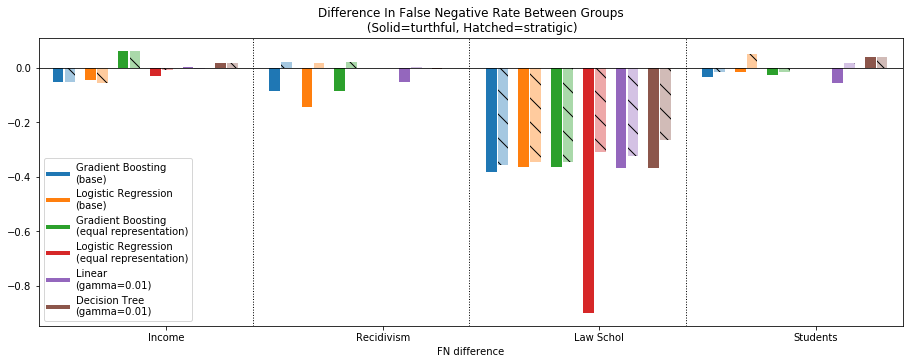

In [239]:
import numpy as np
import matplotlib.pyplot as plt
data = diffs2
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
r = 0
clfs = ['GB_base',  'LG_base', 'GB_equal' , 'LG_equal' , 'LR_0.01', 'DT_0.01']
ax.axhline(0, 0, 4, color='k', linewidth=0.8)
ax.axvline(0.9, 0, 1, color ='k', linewidth=1, linestyle='dotted')
ax.axvline(1.9, 0, 1, color ='k', linewidth=1, linestyle='dotted')
ax.axvline(2.9, 0, 1, color ='k', linewidth=1, linestyle='dotted')


for i in range(len(clfs)):
    ax.bar(X + 0.15*i, [data[j][i][0] for j in range(4)], color=colors[i], width =0.05)
    ax.bar(X + 0.15*i + 0.055, [data[j][i][1] for j in range(4)], color=colors[i], width =0.05, hatch='\\', alpha =0.4)

plt.title('Difference In False Negative Rate Between Groups\n (Solid=turthful, Hatched=stratigic)')
custom_lines = [Line2D([0], [0], color=colors[i], lw=4) for i in range(len(clfs))]
plt.xticks([0.5, 1.5, 2.5, 3.5], names)
ax.legend(custom_lines, [real_clf_names[clf] for clf in clfs])
plt.xlim(-0.09, 3.9)
plt.xlabel("FN difference")
plt.show()